#    Part 1 (uploading, cleaning and converting data / distribution chart)
    This is training task to visualizate some data.
    Data is the salaries of football (soccer) players from USA Major league of soccer.

In [286]:
import pandas as pd
import numpy as np

data = pd.read_csv('C:/Users/user/Desktop/Actual work/WORK PREPARE/Python/Projects/MLS visualization/mls_salaries.csv')

data

,Last Name,First Name,Club,Playing Position,Base Salary,Base Guaranteed Comp.
0,Aaronson,Paxten,Philadelphia Union,M,"$87,500","$91,500"
1,Abdul-Salaam,Saad,FC Cincinnati,D,"$125,000","$133,667"
2,Abecasis,Luciano,San Jose Earthquakes,D,"$380,000","$394,000"
3,Abila,Ramon,Minnesota United,F,"$800,000","$1,105,000"
4,Abubakar,Lalas,Colorado Rapids,D,"$210,000","$247,125"
...,...,...,...,...,...,...
781,Zuparic,Dario,Portland Timbers,D,"$525,000","$541,667"
782,Zusi,Graham,Sporting Kansas City,D,"$650,000","$713,333"
783,NaN,Ilsinho,Philadelphia Union,M,"$450,000","$501,250"
784,NaN,Judson,San Jose Earthquakes,M,"$360,000","$365,000"


    In the cell above we just uploaded and showed our work database.
    In the cell bellow we will check NaN values for more convenient work in future.

In [287]:
data.isnull().sum()

Last Name                3
First Name               0
Club                     0
Playing Position         1
Base Salary              0
Base Guaranteed Comp.    0
dtype: int64

    As we can see database contains very few empty values. So we can drop them from table.

In [288]:
data.drop(data.loc[data['Last Name'].isnull()].index, inplace = True)
data.drop(data.loc[data['Playing Position'].isnull()].index, inplace = True)

In [289]:
data.isnull().sum()

Last Name                0
First Name               0
Club                     0
Playing Position         0
Base Salary              0
Base Guaranteed Comp.    0
dtype: int64

    We will rename some of columns by deleting space between words in their name.

In [290]:
data = data.rename(columns = {'Last Name': 'Last_Name', 'First Name': 'First_Name', 'Playing Position': 'Playing_Position', 'Base Salary': 'Base_Salary', 'Base Guaranteed Comp.': 'Base_Guaranteed'})

    We will create another table with rating and conference of each club (by 2021 season results) for future merge with main database.

In [291]:
data.drop(data.loc[data.Club == 'Major League Soccer'].index, inplace = True)
rate_list = data['Club'].unique()
rate_list = rate_list[:27]
rating = pd.DataFrame({
    "Club" : rate_list,
    "Rating" : [2, 14, 10, 5, 1, 3, 4, 13, 11, 11, 8, 5, 6, 9, 6, 8, 12, 7, 2, 4, 9, 13, 3, 10, 1, 12, 7],
    "Conference" : ['E', 'E', 'W', 'W', 'W', 'E', 'E', 'E', 'W', 'E', 'W', 'E', 'W', 'E', 'E', 'E', 'E', 'E', 'W', 'W', 'W', 'W', 'W', 'E', 'E', 'W', 'W']
})

In [292]:
rating.sort_values(by=['Conference', 'Rating'])

,Club,Rating,Conference
24,New England Revolution,1,E
0,Philadelphia Union,2,E
5,Nashville SC,3,E
6,New York City FC,4,E
11,Atlanta United,5,E
14,Orlando City SC,6,E
17,New York Red Bulls,7,E
15,DC United,8,E
13,Columbus Crew,9,E
23,Montreal,10,E


    Let`s merge.

In [293]:
data = data.join(rating.set_index('Club'), on = 'Club')

In [294]:
data.sort_values(by = ['Club'])

,Last_Name,First_Name,Club,Playing_Position,Base_Salary,Base_Guaranteed,Rating,Conference
411,Lundgaard,Ben,Atlanta United,GK,"$81,375","$81,375",5,E
30,Ambrose,Mikey,Atlanta United,D,"$81,375","$81,375",5,E
170,Damm,Jurgen,Atlanta United,M,"$1,290,000","$1,582,509",5,E
322,Hyndman,Emerson,Atlanta United,M,"$900,000","$900,000",5,E
323,Ibarra,Franco,Atlanta United,D-M,"$300,000","$370,000",5,E
...,...,...,...,...,...,...,...,...
211,Egbo,David,Vancouver Whitecaps,F,"$63,547","$63,547",6,W
459,Metcalfe,Patrick,Vancouver Whitecaps,M,"$66,724","$66,724",6,W
78,Bikel,Janio,Vancouver Whitecaps,M,"$350,000","$388,750",6,W
127,Campagna,Matteo,Vancouver Whitecaps,D-M,"$63,547","$72,559",6,W


    Now we have to check the type of each columns for future manipulate with them.

In [295]:
data.dtypes

Last_Name           object
First_Name          object
Club                object
Playing_Position    object
Base_Salary         object
Base_Guaranteed     object
Rating               int64
Conference          object
dtype: object

    As we can see "Base Salary" and "Base Guaranteed" columns have "object" (string) type so it is impossible to do mathemetical calculations with them. We will convert them to integer type.

In [296]:
for index in data.index:
    data.loc[index, 'Base_Salary'] = data.loc[index, 'Base_Salary'][1:]
    data.loc[index, 'Base_Guaranteed'] = data.loc[index, 'Base_Guaranteed'][1:]

data.Base_Salary = data.Base_Salary.str.replace(',', '')
data.Base_Guaranteed = data.Base_Guaranteed.str.replace(',', '')
data = data.astype({'Base_Salary': int, 'Base_Guaranteed': int})

In [297]:
data.dtypes

Last_Name           object
First_Name          object
Club                object
Playing_Position    object
Base_Salary          int32
Base_Guaranteed      int32
Rating               int64
Conference          object
dtype: object

In [298]:
data

,Last_Name,First_Name,Club,Playing_Position,Base_Salary,Base_Guaranteed,Rating,Conference
0,Aaronson,Paxten,Philadelphia Union,M,87500,91500,2,E
1,Abdul-Salaam,Saad,FC Cincinnati,D,125000,133667,14,E
2,Abecasis,Luciano,San Jose Earthquakes,D,380000,394000,10,W
3,Abila,Ramon,Minnesota United,F,800000,1105000,5,W
4,Abubakar,Lalas,Colorado Rapids,D,210000,247125,1,W
...,...,...,...,...,...,...,...,...
778,Zobeck,Kyle,FC Dallas,GK,85444,85444,11,W
779,Zouhir,Rida,Montreal,M,63547,71730,10,E
780,Zubak,Ethan,LA Galaxy,F,130000,133125,8,W
781,Zuparic,Dario,Portland Timbers,D,525000,541667,4,W


    Let`s check distributions of "Base Salary" and "Base Guaranteed" values.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Base_Guaranteed'>

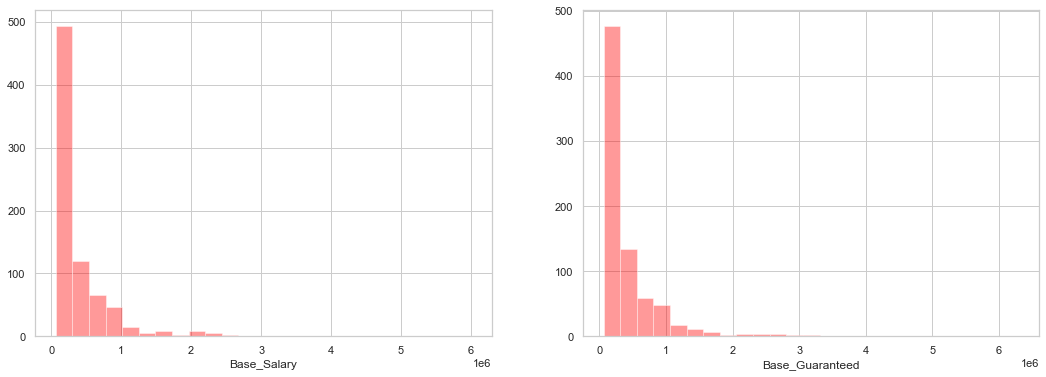

In [299]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.distplot(data.Base_Salary, kde=False, color='red', bins = 25, ax = axes[0])
sns.distplot(data.Base_Guaranteed, kde=False, color='red', bins = 25, ax = axes[1])

#    Part 2 (playing position analysis)
    Firstly, we will analyze and visualize data by playing position of footballers.

In [300]:
position_data = pd.DataFrame()
for i in data['Playing_Position'].unique():
    temp = pd.Series(data.loc[data.Playing_Position == i].Base_Salary.values)
    position_data[i] = temp

position_data

,M,D,F,D-M,M-F,GK,F-M,M-D
0,87500,125000.0,800000.0,135000.0,475000.0,108000.0,300000.0,85500.0
1,1000000,380000.0,975000.0,63547.0,275000.0,272727.0,420000.0,175000.0
2,1943500,210000.0,66724.0,550000.0,259000.0,81375.0,75000.0,81375.0
3,650000,135000.0,200000.0,250000.0,2200000.0,200000.0,NaN,81375.0
4,81375,1149996.0,252000.0,247500.0,2120000.0,106375.0,NaN,73079.0
...,...,...,...,...,...,...,...,...
238,600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,85444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,81375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,1620000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [301]:
position_data.count()

M      243
D      232
F      143
D-M     20
M-F     32
GK      97
F-M      3
M-D      8
dtype: int64

<AxesSubplot:>

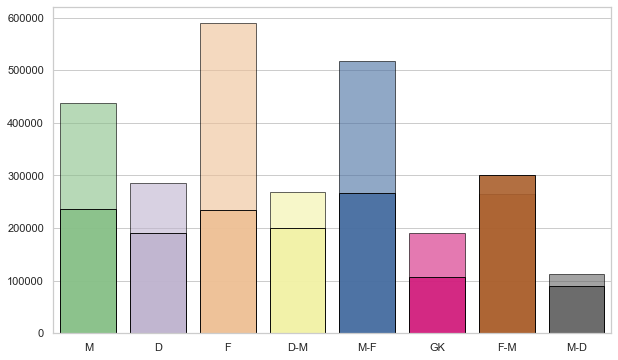

In [302]:
from numpy import median

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
y = position_data.columns
sns.barplot(x = position_data.columns, y = position_data.mean(), palette="Accent", alpha = .6, edgecolor="0")
sns.barplot(x = position_data.columns, y = position_data.median(), palette="Accent", alpha = .9, edgecolor="0")

    In the cell above we compared median and mean values of each playing positions.
    Because of very small number of values in "F-M" and "M-D" categories we have to ignore them for future assess.
    As a result, the lowest paid position both median and mean values if "GK" (goalkeeper).
    The highest paid position by median value is "M-F" (midfielder-forward), by mean value is "F" (forward).
    This means that forwards have much more distributed salaries range (or there are few "outliers" with extremly highest amount of wage. We will check and prove it in the cell below.

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 49.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

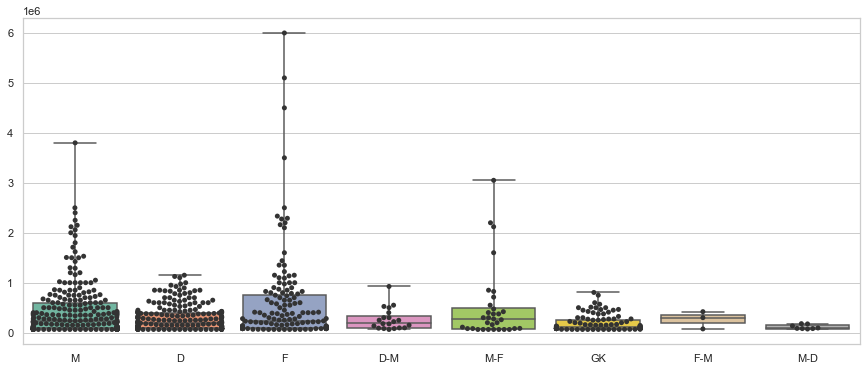

In [303]:
plt.figure(figsize=(15,6))
sns.boxplot(data = position_data, palette = "Set2", whis=np.inf)
sns.swarmplot(data = position_data, color=".2")

    The cell above showed us that "Forwards", "Midfields" and "Midfields-Forwards" have much outliers.
    Moreover, the largest number of outliers contained among midfields and defenders, while the largest separate values of outliers are among forwards.
    In the cell below we will consider these boxplots in smaller range for better understanding of groups` distributions.

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 49.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(0.0, 1724994.0)

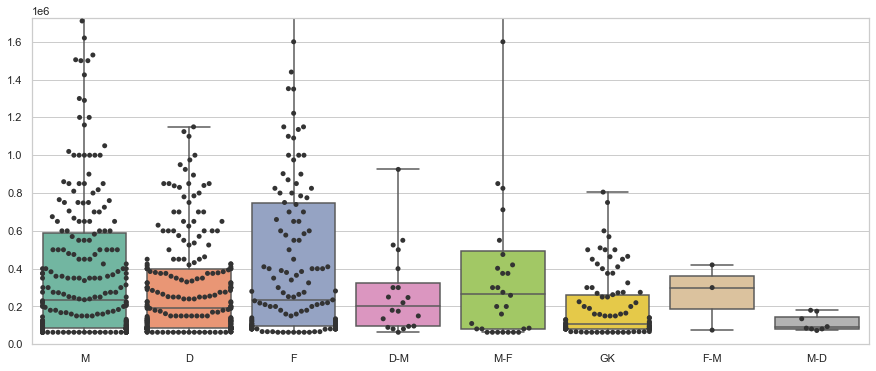

In [304]:
plt.figure(figsize=(15,6))
sns.boxplot(data = position_data, palette = "Set2", whis=np.inf)
sns.swarmplot(data = position_data, color=".2")
plt.ylim([0, position_data['D'].max() * 1.5])

# Part 3 (clubs analysis)
    In this part of analysis we will separate our data by "Club" and do some analyze.
    So let`s create table with salaries value by each club.

In [305]:
club_data = pd.DataFrame()
for i in data['Club'].unique():
    temp = pd.Series(data.loc[data.Club == i].Base_Salary.values)
    club_data[i] = temp

club_data

,Philadelphia Union,FC Cincinnati,San Jose Earthquakes,Minnesota United,Colorado Rapids,Nashville SC,New York City FC,Toronto FC,FC Dallas,Inter Miami,...,New York Red Bulls,Seattle Sounders FC,Portland Timbers,LAFC,Houston Dynamo,Sporting Kansas City,Montreal,New England Revolution,Austin FC,Real Salt Lake
0,87500,125000,380000,800000,210000,975000,135000,66724,650000,81375,...,150000,393600.0,275000,550000,264000,63547,81375,63547,85000,167500
1,810000,1943500,105000,200000,1000000,200000,240000,89513,536000,63547,...,81375,63547.0,108000,365000,81375,125004,85500,200000,650000,81375
2,200000,259000,630000,300000,90000,81375,785000,2161250,66724,120000,...,63547,450000.0,2200000,193000,225000,63547,260000,2120000,290000,85444
3,600000,66724,90000,66724,650000,300000,81375,450000,95000,750000,...,205000,96375.0,67360,360000,63547,135000,170000,110000,1530000,63547
4,350000,300000,106375,384000,110000,85444,700000,1500000,80000,81375,...,63547,175000.0,85444,367875,195500,81375,63547,1000000,400000,63547
5,65000,121000,170000,420000,150000,902500,300000,247500,63547,167500,...,462996,67360.0,300000,90444,275000,500000,800000,375000,81375,85444
6,120000,81375,120000,625000,650000,63547,785000,500000,550000,550000,...,375000,500000.0,650000,90000,150000,1125000,105000,170000,650000,600000
7,325000,1020000,1150000,81375,81375,180000,180000,110000,850000,600000,...,337000,300000.0,1200000,96375,190008,95000,160000,350000,250000,81375
8,425000,63547,850000,66724,140000,700000,197000,85444,346500,63547,...,93581,66724.0,250000,190000,81375,67360,66724,205000,63547,315000
9,100008,273000,160000,450000,160000,66724,95000,100000,2290000,849996,...,409911,81375.0,600000,425000,63547,81375,400000,250000,225000,90000


In [306]:
club_data.describe()

,Philadelphia Union,FC Cincinnati,San Jose Earthquakes,Minnesota United,Colorado Rapids,Nashville SC,New York City FC,Toronto FC,FC Dallas,Inter Miami,...,New York Red Bulls,Seattle Sounders FC,Portland Timbers,LAFC,Houston Dynamo,Sporting Kansas City,Montreal,New England Revolution,Austin FC,Real Salt Lake
count,2.600000e+01,2.600000e+01,2.600000e+01,26.000000,26.000000,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,...,26.000000,2.500000e+01,2.600000e+01,26.000000,2.600000e+01,2.600000e+01,26.000000,2.600000e+01,2.600000e+01,2.600000e+01
mean,3.048018e+05,5.030463e+05,3.297316e+05,352177.192308,281493.653846,3.333235e+05,4.408140e+05,5.062100e+05,3.529449e+05,6.097128e+05,...,307170.076923,4.347225e+05,4.030604e+05,270670.961538,2.650450e+05,4.565395e+05,251590.423077,3.988678e+05,3.297534e+05,3.395230e+05
std,3.132100e+05,6.175968e+05,3.068750e+05,277919.361072,270943.057927,3.672034e+05,5.073507e+05,8.384178e+05,4.557315e+05,1.116185e+06,...,248901.501283,5.859968e+05,4.737306e+05,231570.188280,3.048301e+05,5.479609e+05,254486.429963,5.632536e+05,3.360775e+05,4.799904e+05
min,6.354700e+04,6.354700e+04,6.354700e+04,63547.000000,63547.000000,6.354700e+04,6.354700e+04,6.354700e+04,6.354700e+04,6.354700e+04,...,63547.000000,6.354700e+04,6.354700e+04,79738.000000,6.354700e+04,6.354700e+04,63547.000000,6.354700e+04,6.354700e+04,6.354700e+04
25%,8.595800e+04,9.433300e+04,9.750000e+04,82392.250000,86583.000000,8.239225e+04,1.050000e+05,9.213475e+04,9.625000e+04,8.137500e+04,...,98935.750000,8.137500e+04,8.544400e+04,90111.000000,8.137500e+04,8.137500e+04,81375.000000,9.625000e+04,8.228125e+04,8.544400e+04
50%,1.600000e+05,2.607500e+05,1.950000e+05,292500.000000,150000.000000,1.635000e+05,2.700000e+05,1.175000e+05,1.790625e+05,1.712500e+05,...,275500.000000,1.750000e+05,2.375000e+05,191500.000000,1.550000e+05,1.300020e+05,140000.000000,2.150000e+05,2.450000e+05,1.335000e+05
75%,4.250000e+05,6.675000e+05,4.350000e+05,600000.000000,395000.000000,4.112500e+05,6.000000e+05,4.875000e+05,5.145000e+05,5.875000e+05,...,378750.000000,5.000000e+05,5.750000e+05,391968.750000,2.722500e+05,6.312500e+05,352742.750000,3.750000e+05,3.962500e+05,3.712500e+05
max,1.300000e+06,2.500000e+06,1.150000e+06,849996.000000,1000000.000000,1.505000e+06,2.500000e+06,3.800000e+06,2.290000e+06,5.100000e+06,...,1000000.000000,2.120000e+06,2.200000e+06,1000000.000000,1.352055e+06,2.200000e+06,900000.000000,2.250000e+06,1.530000e+06,2.150000e+06


    In the cell below we will compare minimun, maximum and median values of each club in one chart.

<AxesSubplot:>

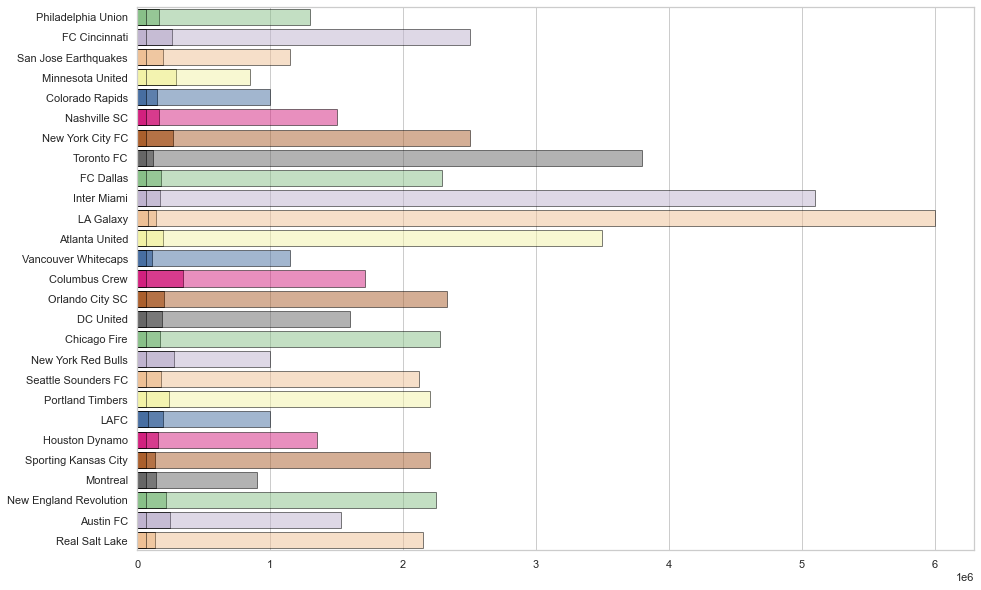

In [307]:
plt.figure(figsize=(15,10))
sns.set_theme(style="whitegrid")
sns.barplot(x = club_data.median(), y = club_data.columns, palette="Accent", alpha = .75, edgecolor="0")
sns.barplot(x = club_data.min(), y = club_data.columns, palette="Accent", alpha = 1, edgecolor="0")
sns.barplot(x = club_data.max(), y = club_data.columns, palette="Accent", alpha = .5, edgecolor="0")

    In a few cells below we will compare boxplot of each club. The rule of compare:
    we take 5 clubs from each conference which have nearby rating values. First chart contains first 5 club from Eastern conference and first 5 club from Western, second chart contains second 5 clubs from each conference and the last chart contains last clubs from each conference. "LA Galaxy" club we consider separatly because of one extremely outlier value.

<AxesSubplot:>

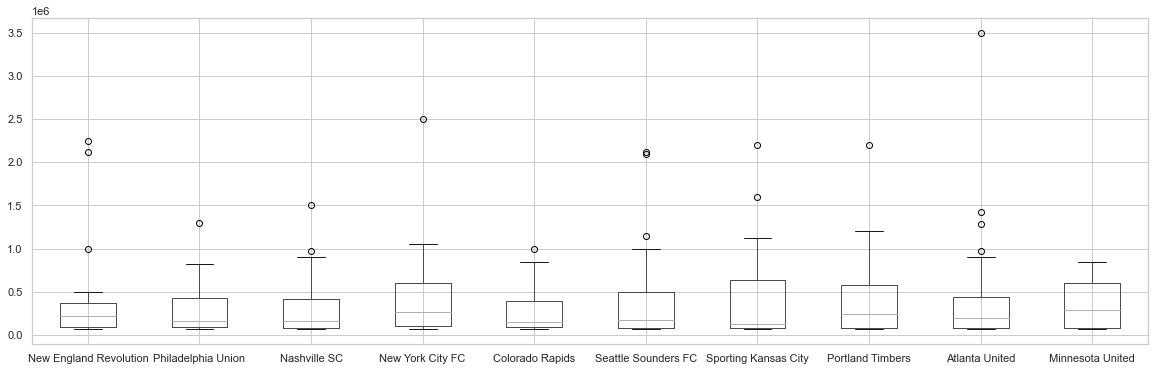

In [24]:
plt.figure(figsize=(20,6))
club_data.boxplot(column = ['New England Revolution', 'Philadelphia Union', 'Nashville SC', 'New York City FC', 'Colorado Rapids', 'Seattle Sounders FC', 'Sporting Kansas City', 'Portland Timbers', 'Atlanta United', 'Minnesota United'])

<AxesSubplot:>

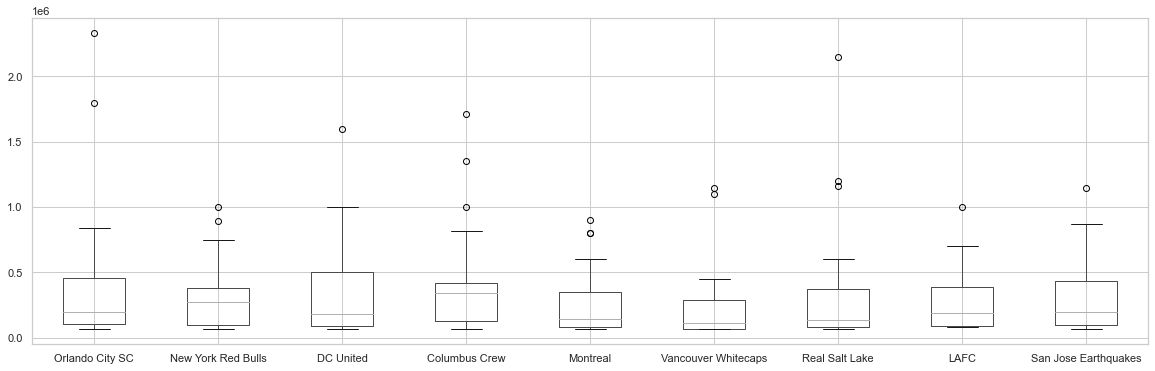

In [25]:
plt.figure(figsize=(20,6))
club_data.boxplot(column = ['Orlando City SC', 'New York Red Bulls', 'DC United', 'Columbus Crew', 'Montreal', 'Vancouver Whitecaps', 'Real Salt Lake', 'LAFC', 'San Jose Earthquakes'])

<AxesSubplot:>

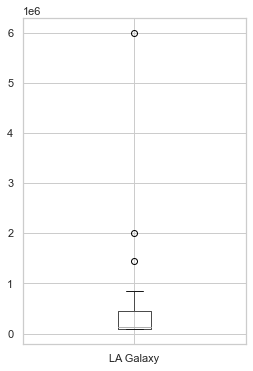

In [26]:
plt.figure(figsize=(4,6))
club_data.boxplot(column = ['LA Galaxy'])

<AxesSubplot:>

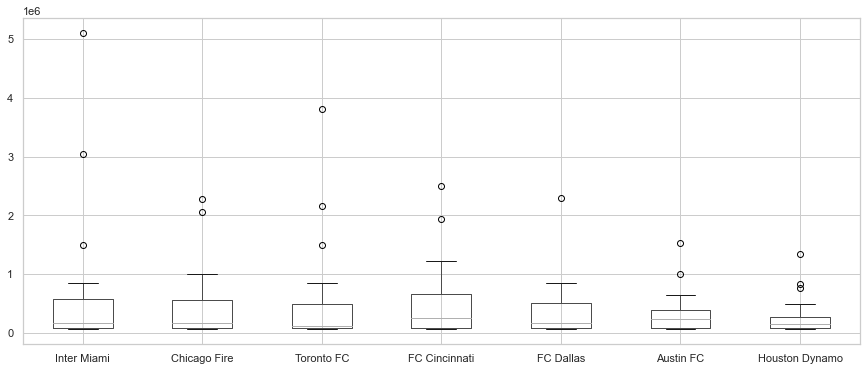

In [27]:
plt.figure(figsize=(15,6))
club_data.boxplot(column = ['Inter Miami', 'Chicago Fire', 'Toronto FC', 'FC Cincinnati', 'FC Dallas', 'Austin FC', 'Houston Dynamo'])

# Part 4 (correlations)
    In this part of work we calculate and visualize correlation between salaries and club rating.
    So, firstly, we will count correlation value between all football players salaries and their clubs` rating.

In [308]:
salary_rating_corr = np.corrcoef(data.Base_Salary, data.Rating)
print("Correlation between Players` salary and rating of Players` club = ", salary_rating_corr[0, 1])

Correlation between Players` salary and rating of Players` club =  0.03151223095497955


    In the cell above we see extremly low value of correlation so we can assert that there is no correlation between all football players salaries and their clubs` rating.
    So let`s check possible correlation between mean values of salaries of each clubs with their rating.

In [309]:
mean_series = pd.Series(club_data.mean())

mean_club_data = rating

for i in mean_series.index:
    mean_club_data.loc[mean_club_data.Club == i, "Mean_salary"] = mean_series[i]
    
mean_club_data

,Club,Rating,Conference,Mean_salary
0,Philadelphia Union,2,E,304801.846154
1,FC Cincinnati,14,E,503046.346154
2,San Jose Earthquakes,10,W,329731.576923
3,Minnesota United,5,W,352177.192308
4,Colorado Rapids,1,W,281493.653846
5,Nashville SC,3,E,333323.461538
6,New York City FC,4,E,440813.961538
7,Toronto FC,13,E,506210.038462
8,FC Dallas,11,W,352944.884615
9,Inter Miami,11,E,609712.807692


In [310]:
club_rating_corr = np.corrcoef(mean_club_data.Mean_salary, mean_club_data.Rating)
print("Correlation between mean salary by club and rating of clubs = ", club_rating_corr[0, 1])

Correlation between mean salary by club and rating of clubs =  0.13913052486163427


    In the cell above we are still seeing a small value of correlation so we can assert the absence of correlation again.

In [72]:
mean_club_data.sort_values(by=['Conference', 'Rating'])

,Club,Rating,Conference,Mean_salary
24,New England Revolution,1,E,398867.807692
0,Philadelphia Union,2,E,304801.846154
5,Nashville SC,3,E,333323.461538
6,New York City FC,4,E,440813.961538
11,Atlanta United,5,E,481295.692308
14,Orlando City SC,6,E,394713.730769
17,New York Red Bulls,7,E,307170.076923
15,DC United,8,E,354016.730769
13,Columbus Crew,9,E,414877.769231
23,Montreal,10,E,251590.423077


    For visualize level of correlation we will put on the chart all points (by axis x - is mean salary value of club, 
    by axis y - is rating of club) and build a line.
    This line is simple model of depence between salaries and rating. Model built by next considerations:
    The 14th club of East conference (West conference has only 13 club) have to has the lowest mean value of salary - 241221.846 US dollars. The 1st club of East conference (no metter which conference on fact) have to has the highest mean value of salary - 609712.808 US dollars. Therefore we have next line equation:
    y = -0.00003528*x + 22.51
    Also we will connect real value of points with their predictable positions on the line.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


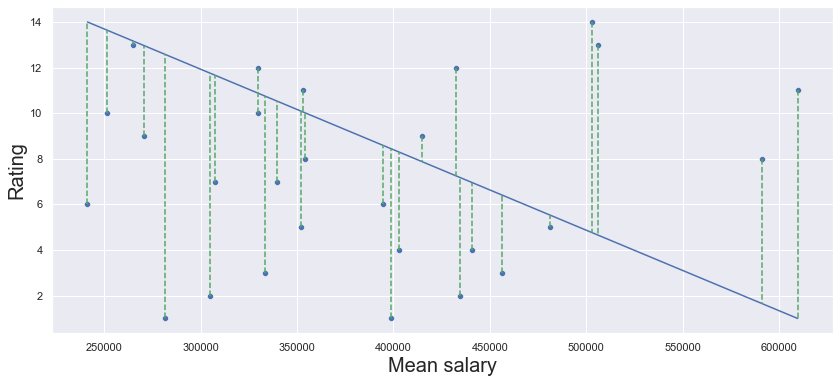

In [325]:
plt.figure(figsize=(14,6))
salary_rating_scatter = sns.scatterplot(data = mean_club_data, x = "Mean_salary", y = "Rating")
salary_rating_scatter = sns.lineplot([mean_club_data.Mean_salary.min(), mean_club_data.Mean_salary.max()], [14, 1])
salary_rating_scatter.set_xlabel("Mean salary", fontsize = 20)
salary_rating_scatter.set_ylabel("Rating", fontsize = 20)
t = 0
for i in mean_club_data.Mean_salary:
    x = i
    y = mean_club_data.loc[mean_club_data.Mean_salary == i].Rating[t]
    t = t + 1
    plt.plot([x, x], [y, x*(-0.00003528) + 22.51], 'g', linestyle="--")
plt.show()

# Part 5 (conference analysis)
    In the last part of this work we will compare data by conference.

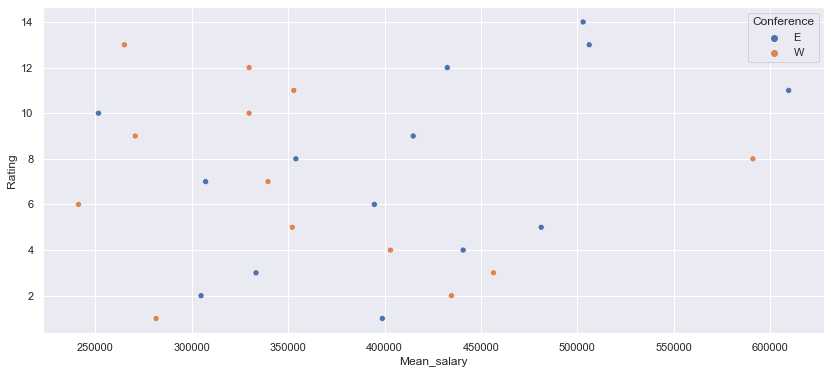

In [326]:
plt.figure(figsize=(14,6))
rel = sns.scatterplot(data = mean_club_data, x = "Mean_salary", y = "Rating", hue = "Conference")
plt.show()

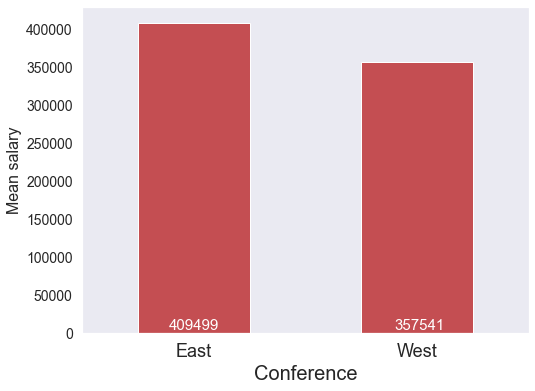

In [327]:
conference_mean = pd.Series([mean_club_data.where(mean_club_data.Conference == "E").Mean_salary.mean(), mean_club_data.where(mean_club_data.Conference == "W").Mean_salary.mean()], index = ["East", "West"])

conference_mean.plot.bar(figsize=(8,6), color = 'r')
plt.yticks(fontsize = 14)
plt.grid(visible=False)
plt.text(-0.11, 0, int(mean_club_data.where(mean_club_data.Conference == "E").Mean_salary.mean()), 
         verticalalignment = 'bottom', color = "w", fontsize = 15)
plt.text(0.9, 0, int(mean_club_data.where(mean_club_data.Conference == "W").Mean_salary.mean()), 
         verticalalignment = 'bottom', color = "w", fontsize = 15)
plt.xticks(rotation='horizontal', fontsize = 18)
plt.ylabel("Mean salary", fontsize = 16)
plt.xlabel("Conference", fontsize = 20)
plt.show()

# Part 6 (conclusions)
    - Most of footballers from MLS have closely minimum salary. Minimum salary of all league - standardized.
    - There is no noticeable difference between base salary and base guaranteed salary.
    - Forwards and midfields have the highest wage. Goalkeeper - the lowest.
    - In Eastern conference there are wealthier club. But 3 of 4 wealthiest of them don`t even in top-10 team (2021 season).
    - There are no correlation between amount of salary (both players` and teams` mean value) and clubs` rating.